In [2]:
library(tidyverse)
library(cansim)
library(readr)
library(vroom)
library(lubridate)
library(tseries)
library(strucchange)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'vroom'


The following objects are masked from 'package:readr':

    as.col_spec, col_character, col_date, col_datetime, col_double,
    col_factor, col_guess, col_integer, col_logical, col_number,
    col_skip, col_time, cols, cols_condense, cols_only, date_names,
    date_names_lang, date_names_langs, default_locale, fwf_cols,
    fwf_empty, fwf_positions, fwf_widths, locale, output_column,
    problems, spec


Registered S3 method overwritten by 'q

In [3]:
gdp_vec <- get_cansim_vector_for_latest_periods("v1000000673", periods = 300)

Accessing CANSIM NDM vectors from Statistics Canada



In [9]:
glimpse(gdp_vec)

Rows: 113
Columns: 16
$ REF_DATE                                                <chr> "1997-01-01", …
$ Date                                                    <date> 1997-01-01, 1…
$ GEO                                                     <fct> Canada, Canada…
$ `Seasonal adjustment`                                   <fct> Seasonally adj…
$ Prices                                                  <fct> Chained (2017)…
$ `North American Industry Classification System (NAICS)` <fct> "All industrie…
$ VALUE                                                   <dbl> 1209051, 12234…
$ val_norm                                                <dbl> 1.209051e+12, …
$ SCALAR_ID                                               <int> 6, 6, 6, 6, 6,…
$ VECTOR                                                  <chr> "v1000000673",…
$ cansimTableNumber                                       <chr> "36-10-0449", …
$ COORDINATE                                              <chr> "1.1.1.1", "1.…
$ SYMBOL          

In [5]:
gdp_quarterly_stationary <- gdp_vec |>
  select(Date, VALUE) |>
  mutate(quarter = quarter(Date, with_year = TRUE)) |>
  group_by(quarter) |>
  summarise(VALUE = mean(VALUE, na.rm = TRUE)) |>
  ungroup() |>
  mutate(
    gdp_previous_quarter = lag(VALUE, 1),
    delta_gdp = (log(VALUE) - log(gdp_previous_quarter)) * 100
  )|>
drop_na()

print(gdp_quarterly_stationary)


# A tibble: 112 × 4
   quarter   VALUE gdp_previous_quarter delta_gdp
     <dbl>   <dbl>                <dbl>     <dbl>
 1   1997. 1223409              1209051     1.18 
 2   1997. 1241346              1223409     1.46 
 3   1997. 1252507              1241346     0.895
 4   1998. 1264546              1252507     0.957
 5   1998. 1270591              1264546     0.477
 6   1998. 1278736              1270591     0.639
 7   1998. 1297677              1278736     1.47 
 8   1999. 1315508              1297677     1.36 
 9   1999. 1331290              1315508     1.19 
10   1999. 1353163              1331290     1.63 
# ℹ 102 more rows


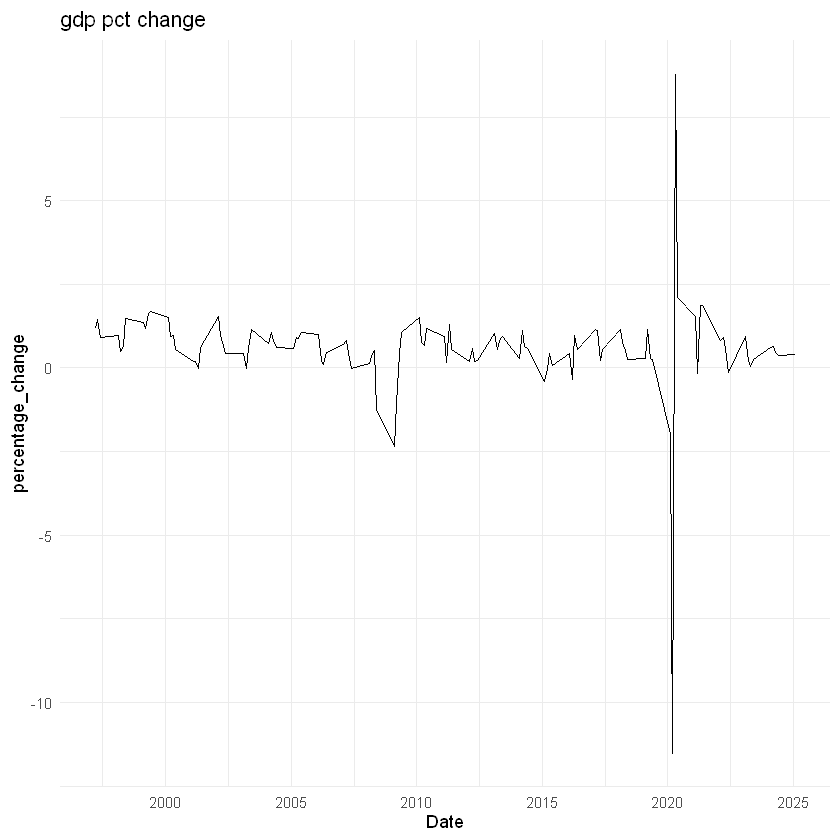

In [7]:
ggplot(gdp_quarterly_stationary , aes(x = quarter, y = delta_gdp)) +
  geom_line() +
  labs(
    title = "gdp pct change",
    x = "Date",
    y = "percentage_change",
  ) +
  theme_minimal()


In [8]:
adf.test(na.omit(gdp_quarterly_stationary$delta_gdp))

Warning message in adf.test(na.omit(gdp_quarterly_stationary$delta_gdp)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  na.omit(gdp_quarterly_stationary$delta_gdp)
Dickey-Fuller = -4.9999, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary
